<a href="https://colab.research.google.com/github/raunakpriyam/Stock-Prediction/blob/main/Stock_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Extract the stock of Microsoft
df = web.DataReader('MSFT',data_source='yahoo',start='2010-01-01',end='2020-12-31')
df['Close']

Date
2010-01-04     30.950001
2010-01-05     30.959999
2010-01-06     30.770000
2010-01-07     30.450001
2010-01-08     30.660000
                 ...    
2020-12-24    222.750000
2020-12-28    224.960007
2020-12-29    224.149994
2020-12-30    221.679993
2020-12-31    222.419998
Name: Close, Length: 2769, dtype: float64

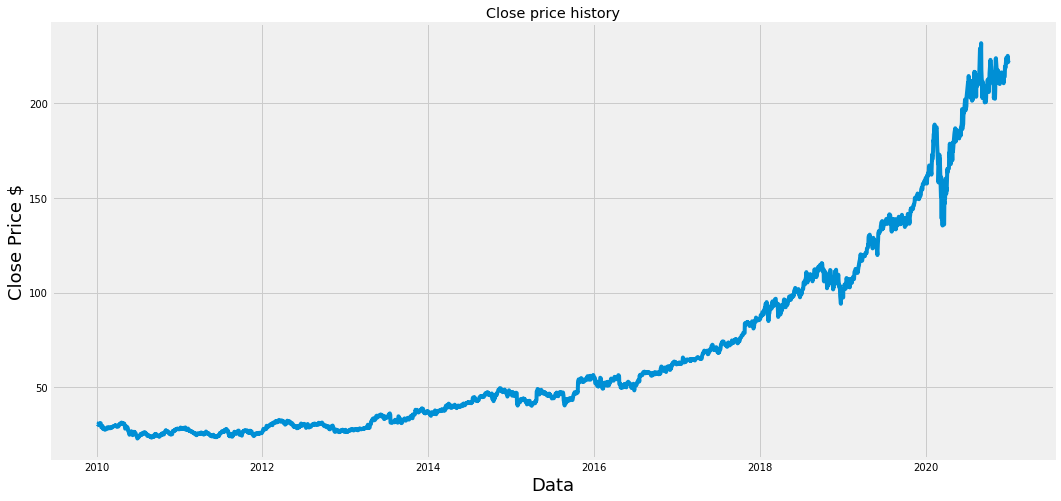

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.show()

In [7]:
df.shape

(2769, 6)

In [8]:
 #Create new dataframe with close column
 data=df.filter(['Close'])
 #Convert the dataframe numpy
 dataset = data.values
 #no of rows
 training_data_len=math.ceil(len(dataset)*0.8)
 training_data_len

2216

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03805599],
       [0.03810391],
       [0.03719325],
       ...,
       [0.96405291],
       [0.95221433],
       [0.95576114]])

In [10]:
#Create the training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.03805599, 0.03810391, 0.03719325, 0.03565951, 0.03666603,
       0.03479678, 0.03383819, 0.03518022, 0.03810391, 0.03762462,
       0.03877493, 0.03633052, 0.03355061, 0.02851802, 0.03024348,
       0.03110621, 0.03192101, 0.02947661, 0.02477953, 0.0258819 ,
       0.02612154, 0.02693635, 0.02314992, 0.02401266, 0.02257477,
       0.02396472, 0.02386886, 0.02449195, 0.02358129, 0.02559433,
       0.02674463, 0.02856595, 0.02760736, 0.02741564, 0.02549847,
       0.02693635, 0.02679256, 0.02712807, 0.0288056 , 0.02612154,
       0.02612154, 0.02693635, 0.02674463, 0.02693635, 0.02775115,
       0.02856595, 0.02957247, 0.03000384, 0.0300997 , 0.03048313,
       0.03172929, 0.03163344, 0.03153758, 0.03158551, 0.03292753,
       0.03182515, 0.03355061, 0.03187308, 0.03153758, 0.03240031])]
[0.030099697456138608]

[array([0.03805599, 0.03810391, 0.03719325, 0.03565951, 0.03666603,
       0.03479678, 0.03383819, 0.03518022, 0.03810391, 0.03762462,
       0.03877493, 0.03633052, 0.0

In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2156, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
#Train model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2156/2156 [==============================] - 51s 22ms/step - loss: 3.4514e-04


In [16]:
#Create the testing data set
#new array from index 1543 to 2003
test_data =scaled_data[training_data_len-60: , : ]
#Create data set
x_test=[]
y_test=dataset[training_data_len:, : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [17]:
#Convert the data to numpy array
x_test=np.array(x_test)

In [18]:
#Reshape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#Get the (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.841064011641048

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


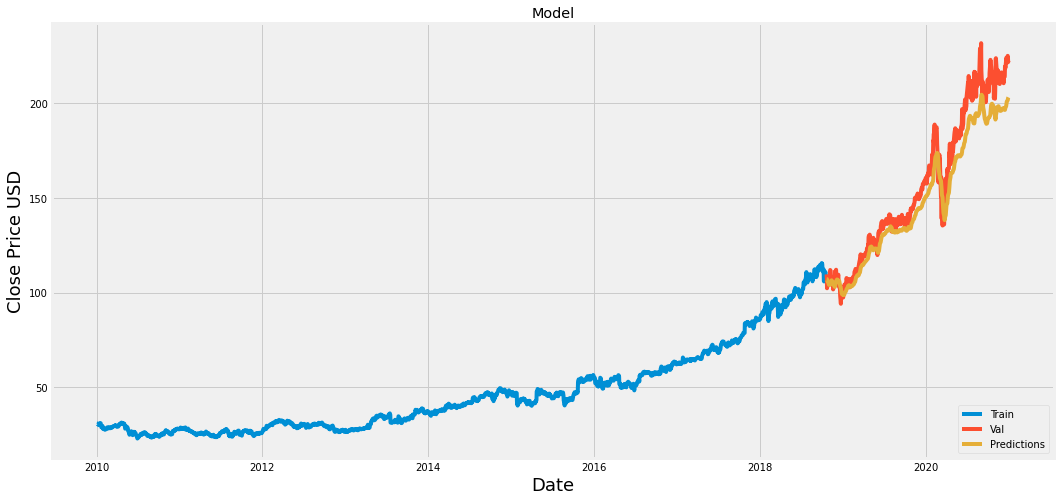

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [22]:
valid

,Close,Predictions
Date,,
2018-10-22,109.629997,107.198013
2018-10-23,108.099998,107.176399
2018-10-24,102.320000,107.052704
2018-10-25,108.300003,106.339119
2018-10-26,106.959999,105.966957
...,...,...
2020-12-24,222.750000,200.891098
2020-12-28,224.960007,201.520340
2020-12-29,224.149994,202.228119


In [24]:
! git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [25]:
! git init

Initialized empty Git repository in /content/.git/


In [26]:
!git clone https://github.com/raunakpriyam/Stock-Prediction.git

Cloning into 'Stock-Prediction'...


In [27]:
! pwd

/content


In [28]:
%cd Stock-Prediction/

/content/Stock-Prediction


In [29]:
! git remote -v

origin	https://github.com/raunakpriyam/Stock-Prediction.git (fetch)
origin	https://github.com/raunakpriyam/Stock-Prediction.git (push)


In [30]:
! git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [31]:
! git add -A

In [32]:
! git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)
